In [326]:
import pandas as pd
import numpy as np
from numpy import absolute
from numpy import mean
from numpy import std
from sklearn import preprocessing, metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.neural_network import MLPRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestRegressor

In [327]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / (y_true+1))) * 100

In [344]:
df01 = pd.read_csv("bellman_performance_results_final.csv")
df02 = pd.read_csv("dijkstra_performance_results_final.csv")
df03 = pd.read_csv("hybrid_performance_results_final.csv")


In [345]:
df01['AlgoBellman'] = 1
df01['AlgoDijkstra'] = 0
df01['AlgoHybrid'] = 0
df02['AlgoBellman'] = 0
df02['AlgoDijkstra'] = 1
df02['AlgoHybrid'] = 0
df03['AlgoBellman'] = 0
df03['AlgoDijkstra'] = 0
df03['AlgoHybrid'] = 1

In [346]:
frames = [df01, df02, df03]
concat = pd.concat(frames)
df1 = concat
print(df1)

      vertexNum    edgeNum  iterationNum  maxEdgeDegree  minProcessEdge  \
0        524288    8387658             7          25054               0   
1        524288    8387658             7          25054               2   
2        524288    8387658             7          25054               3   
3        524288    8387658             7          25054               4   
4        524288    8387658             7          25054               6   
...         ...        ...           ...            ...             ...   
1100   33554432  528693459             3         372162             561   
1101   33554432  528693459             4         372162             561   
1102   33554432  528693459             5         372162             561   
1103   33554432  528693459             6         372162             561   
1104   33554432  528693459             7         372162             561   

      percentage  sOriginalDistance  sMinEdgetoProcess  sApprAttrValues  \
0            1.0        

In [347]:
conditions = [df1['vertexNum'] == 524288, df1['vertexNum'] == 1048576, df1['vertexNum'] == 2097152, df1['vertexNum'] == 4194304, df1['vertexNum'] == 8388608, df1['vertexNum'] == 16777216, df1['vertexNum'] == 33554432]
numbers = [1, 2, 4, 8, 16, 32, 64]
df1['graphSize'] = np.select(conditions, numbers, default=0)
print(df1)

      vertexNum    edgeNum  iterationNum  maxEdgeDegree  minProcessEdge  \
0        524288    8387658             7          25054               0   
1        524288    8387658             7          25054               2   
2        524288    8387658             7          25054               3   
3        524288    8387658             7          25054               4   
4        524288    8387658             7          25054               6   
...         ...        ...           ...            ...             ...   
1100   33554432  528693459             3         372162             561   
1101   33554432  528693459             4         372162             561   
1102   33554432  528693459             5         372162             561   
1103   33554432  528693459             6         372162             561   
1104   33554432  528693459             7         372162             561   

      percentage  sOriginalDistance  sMinEdgetoProcess  sApprAttrValues  \
0            1.0        

In [348]:
#one-hot encoding - nothing is dropped

df1 = df1.drop(['vertexNum', 'edgeNum', 'maxEdgeDegree',
                'sAtomicMinBlock', 'sAtomicMaxBlock',
                'sAtomicAddBlock'], axis=1)


print(df1)
df1.dropna(inplace=True)
print(df1)


      iterationNum  minProcessEdge  percentage  sOriginalDistance  \
0                7               0         1.0                  1   
1                7               2         1.0                  0   
2                7               3         1.0                  0   
3                7               4         1.0                  0   
4                7               6         1.0                  0   
...            ...             ...         ...                ...   
1100             3             561         1.0                  0   
1101             4             561         1.0                  0   
1102             5             561         1.0                  0   
1103             6             561         1.0                  0   
1104             7             561         1.0                  0   

      sMinEdgetoProcess  sApprAttrValues  sReduceExecution  \
0                     0                0                 0   
1                     1                0       

In [349]:
df1 = df1[df1['minProcessEdge'] >= 0]



for i in numbers:
    mini = df1[df1['graphSize'] == i]['minProcessEdge'].min()
    maxi = df1[df1['graphSize'] == i]['minProcessEdge'].max()
    df1.loc[df1['graphSize'] == i, ['minProcessEdge']] = 1.0 / ((((df1.loc[df1['graphSize'] == i, ['minProcessEdge']] - mini) / (maxi - mini)) * 9) + 1)

print(df1)

      iterationNum  minProcessEdge  percentage  sOriginalDistance  \
0                7        1.000000         1.0                  1   
1                7        0.960870         1.0                  0   
2                7        0.942431         1.0                  0   
3                7        0.924686         1.0                  0   
4                7        0.891129         1.0                  0   
...            ...             ...         ...                ...   
1100             3        0.100000         1.0                  0   
1101             4        0.100000         1.0                  0   
1102             5        0.100000         1.0                  0   
1103             6        0.100000         1.0                  0   
1104             7        0.100000         1.0                  0   

      sMinEdgetoProcess  sApprAttrValues  sReduceExecution  \
0                     0                0                 0   
1                     1                0       

In [350]:
X = df1.drop(['executionTime', 'Error'],axis=1)
#y = df1[['executionTime']]
y = df1[['executionTime', 'Error']]

In [351]:
X = X.values
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [336]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(r2_score(y_pred, y_test))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAPE: ', mean_absolute_percentage_error(y_test, y_pred))

0.44269037149618357
Mean Absolute Error: 55.26502745120746
Mean Squared Error: 11257.08094734558
Root Mean Squared Error: 106.09939183306179
MAPE:  348.5216242053659


In [337]:
print(y_test)
print(y_pred)

      executionTime      Error
821          97.125  46.383034
217          24.875   0.255608
646          26.250  25.368210
229          23.000   0.914919
518          99.125   4.792378
...             ...        ...
599         190.250   0.306336
1061       1343.000   3.634882
525         104.250   4.792378
825          69.875  13.575014
374          52.750   4.144991

[819 rows x 2 columns]
[[ 195.79970087   28.87463534]
 [  35.08946229   -0.65600604]
 [-115.72288904   30.1602262 ]
 ...
 [ 258.73029346   -3.34355179]
 [  -6.7764914    20.91721424]
 [  55.62072221   21.88408857]]


In [338]:
model = KNeighborsRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score: ', r2_score(y_test, y_pred))
print('MAPE: ', mean_absolute_percentage_error(y_test, y_pred))

Mean Absolute Error: 5.495965413675211
Mean Squared Error: 293.5417429705773
Root Mean Squared Error: 17.13305994183693
R2 score:  0.9607228901575908
MAPE:  28.55553367143637


In [339]:
print(y_test)
print(y_pred)

      executionTime      Error
821          97.125  46.383034
217          24.875   0.255608
646          26.250  25.368210
229          23.000   0.914919
518          99.125   4.792378
...             ...        ...
599         190.250   0.306336
1061       1343.000   3.634882
525         104.250   4.792378
825          69.875  13.575014
374          52.750   4.144991

[819 rows x 2 columns]
[[ 97.075      46.383034 ]
 [ 23.15        1.6644604]
 [ 25.975      26.0000516]
 ...
 [103.225       7.1666326]
 [ 67.275      14.7493546]
 [ 57.55        6.0985622]]


In [340]:
model = RandomForestRegressor(max_depth=1000, n_estimators=100, random_state=1)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score: ', r2_score(y_test, y_pred))

cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print('MAPE: ', mean_absolute_percentage_error(y_test, y_pred))

Mean Absolute Error: 2.059706112018664
Mean Squared Error: 99.25256215828031
Root Mean Squared Error: 9.962558012793718
R2 score:  0.9916077616361527
MAE: 1.725 (0.190)
MAPE:  6.861076265801387


[23.1325, 24.42, 25.98, 39.00375, 39.2025, 39.34375, 62.765, 66.74875, 67.0875, 79.625, 97.80875, 98.18875, 194.11625, 196.625, 200.4525, 226.22375, 226.88625, 508.41125, 742.9575, 1172.02625]
[23.0, 24.875, 26.25, 39.0, 39.125, 39.875, 65.875, 67.375, 67.5, 78.125, 97.125, 99.125, 194.75, 195.125, 202.25, 224.5, 227.125, 511.125, 748.25, 1136.125]


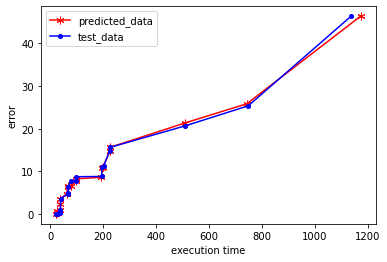

In [342]:
y_pred_exec = []
y_pred_err = []
y_test_exec = []
y_test_err = []
y_test_n = y_test.to_numpy()
y_pred_n = y_pred
y_test_n.sort()
y_pred_n.sort()
for i in range(20):
    y_pred_exec.append(y_pred_n[i][1])
    y_pred_err.append(y_pred_n[i][0])
    y_test_exec.append(y_test_n[i][1])
    y_test_err.append(y_test_n[i][0])
    
y_pred_exec.sort()
y_test_exec.sort()
y_pred_err.sort()
y_test_err.sort()
print(y_pred_exec)
print(y_test_exec)
    

draw_BFDJ(y_pred_exec, y_pred_err, y_test_exec, y_test_err, "execution time", "error")

In [343]:
print(y_test.head(60))
print(y_pred)

      executionTime        Error
821       46.383034    97.125000
217        0.255608    24.875000
646       25.368210    26.250000
229        0.914919    23.000000
518        4.792378    99.125000
1089      15.625386    67.375000
1389      11.277799   195.125000
51         0.001283    67.500000
85         0.000000    78.125000
1380      10.960795   202.250000
1873      14.768590   511.125000
636        3.600784   194.750000
1287       8.789064   227.125000
39         7.775328    65.875000
647       20.682224    39.875000
549        6.369783    39.000000
1099       7.662943  1136.125000
239        4.646204    39.125000
155        0.010089   748.250000
1303       8.724759   224.500000
1084       5.153821  1215.250000
934       22.519369    37.500000
447       17.576965    51.000000
970        0.719276   122.375000
685       21.265091    46.500000
184        0.151353    32.125000
768        2.679620   358.250000
1300      13.975708   115.875000
1070      10.712226   125.500000
1187      

In [352]:
#predicts the best results

model = DecisionTreeRegressor(max_depth=1000, splitter="best", criterion="mse", min_samples_split=2)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score: ', r2_score(y_test, y_pred))

cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print('MAPE: ', mean_absolute_percentage_error(y_test, y_pred))

Mean Absolute Error: 2.2850185964590963
Mean Squared Error: 107.48730144360448
Root Mean Squared Error: 10.367608279810947
R2 score:  0.9901246783483328
MAE: 1.906 (0.230)
MAPE:  3.06967260451819


[23.0, 24.75, 26.0, 39.0, 39.25, 39.375, 63.25, 66.625, 66.875, 78.75, 98.125, 98.375, 194.625, 195.75, 201.25, 224.25, 225.75, 506.0, 761.5, 1173.25]
[23.0, 24.875, 26.25, 39.0, 39.125, 39.875, 65.875, 67.375, 67.5, 78.125, 97.125, 99.125, 194.75, 195.125, 202.25, 224.5, 227.125, 511.125, 748.25, 1136.125]


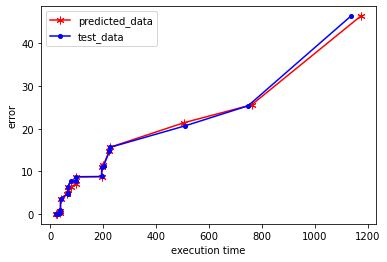

In [354]:
y_pred_exec = []
y_pred_err = []
y_test_exec = []
y_test_err = []
y_test_n = y_test.to_numpy()
y_test_n.sort()
y_pred.sort()
for i in range(20):
    y_pred_exec.append(y_pred[i][1])
    y_pred_err.append(y_pred[i][0])
    y_test_exec.append(y_test_n[i][1])
    y_test_err.append(y_test_n[i][0])
    
y_pred_exec.sort()
y_test_exec.sort()
y_pred_err.sort()
y_test_err.sort()
print(y_pred_exec)
print(y_test_exec)
    

draw_BFDJ(y_pred_exec, y_pred_err, y_test_exec, y_test_err, "execution time", "error")

In [353]:
print(y_test.head(60))
print(y_pred)

      executionTime      Error
821          97.125  46.383034
217          24.875   0.255608
646          26.250  25.368210
229          23.000   0.914919
518          99.125   4.792378
1089         67.375  15.625386
1389        195.125  11.277799
51           67.500   0.001283
85           78.125   0.000000
1380        202.250  10.960795
1873        511.125  14.768590
636         194.750   3.600784
1287        227.125   8.789064
39           65.875   7.775328
647          39.875  20.682224
549          39.000   6.369783
1099       1136.125   7.662943
239          39.125   4.646204
155         748.250   0.010089
1303        224.500   8.724759
1084       1215.250   5.153821
934          37.500  22.519369
447          51.000  17.576965
970         122.375   0.719276
685          46.500  21.265091
184          32.125   0.151353
768         358.250   2.679620
1300        115.875  13.975708
1070        125.500  10.712226
1187        112.500  13.979568
912           0.000  50.586151
620     

In [20]:
#t = [(2),(3),(4),(5),(6),(7),(8),(9),(10),(2,2),(3,2),(4,2),(5,2),(6,2),(7,2),(8,2)]

#sc_X = StandardScaler()
#X_trainscaled=sc_X.fit_transform(x_train)
#X_testscaled=sc_X.transform(x_test)
X_trainscaled = x_train
X_testscaled = x_test

model = MLPRegressor(hidden_layer_sizes=(4,8,4),activation="relu" ,random_state=1, max_iter=50000)
#model.fit(X_trainscaled, y_train.values.ravel()).loss_
model.fit(X_trainscaled, y_train).loss_ #multiple outputs
print(model.loss_)
#print(model.loss_curve_)
print(model.n_outputs_)
print(model.best_loss_)
y_pred=model.predict(X_testscaled)


print(r2_score(y_pred, y_test))
#print("Training set score: %f" % model.score(X_trainscaled, y_train.values.ravel()))
print("Training set score: %f" % model.score(X_trainscaled, y_train)) #multiple output
print("Test set score: %f" % model.score(X_testscaled, y_test))
print('MAPE: ', mean_absolute_percentage_error(y_test, y_pred))

349.03836847878284
2
348.6165394998875
-6.208512668324784
Training set score: 0.491691
Test set score: 0.479734
MAPE:  101.96432556063719


In [21]:
print(y_test)
print(y_pred)
print("Test set score: %f" % model.score(X_testscaled, y_test))

      executionTime      Error
165        1453.250   0.305325
523         105.250   4.048765
925         691.500   3.044508
164        1448.750   0.158898
373          25.000  24.031317
...             ...        ...
1843        620.125  10.632913
513          42.500   1.912163
487         109.500   1.479863
901          64.375  14.572922
827          69.750  14.065902

[758 rows x 2 columns]
[[1396.71967924   -2.58203792]
 [  98.30302225   12.38387991]
 [ 660.09867325    5.8609019 ]
 ...
 [ 132.61591635   11.28147543]
 [  50.06303958   11.64616643]
 [  60.43082523   11.75250415]]
Test set score: 0.479734


In [22]:
print("y1 MSE:%.4f" % mean_squared_error(y_test, y_pred)) 

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAPE: ', mean_absolute_percentage_error(y_test, y_pred))
#print("y2 MSE:%.4f" % mean_squared_error(y_test[:,1], y_pred[:,1]))

y1 MSE:657.8878
Mean Absolute Error: 15.892685996317976
Mean Squared Error: 657.8878127445028
Root Mean Squared Error: 25.649323826263
MAPE:  101.96432556063719




# multioutputregressor - prediction of both execution and error at the same time



In [23]:
X = df1.drop(['executionTime', 'Error'],axis=1)
y = df1[['executionTime', 'Error']]

In [24]:
X = X.values
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [25]:
model = MultiOutputRegressor(Ridge(random_state=123))
model.fit(x_train, y_train)
#print(y_test)
y_pred = model.predict(x_test)

print(r2_score(y_pred, y_test))
print('MAPE: ', mean_absolute_percentage_error(y_test, y_pred))

0.4011275093399928
MAPE:  335.1301060598332


In [26]:
print(y_test)
print(y_pred)

      executionTime      Error
165        1453.250   0.305325
523         105.250   4.048765
925         691.500   3.044508
164        1448.750   0.158898
373          25.000  24.031317
...             ...        ...
1843        620.125  10.632913
513          42.500   1.912163
487         109.500   1.479863
901          64.375  14.572922
827          69.750  14.065902

[758 rows x 2 columns]
[[ 1.04663944e+03 -7.72323134e-01]
 [ 2.29089419e+02  2.21529330e-01]
 [ 5.43618591e+02  8.23968874e+00]
 ...
 [ 2.36194984e+02  1.72910212e-01]
 [-4.92231229e+01  2.49098116e+01]
 [-2.96499032e+00  2.15941106e+01]]


# Split Training-Test by graph size

In [361]:
#X = df1.drop(['executionTime', 'Error'],axis=1)
#y = df1[['executionTime', 'Error']]

a = df1.loc[(df1['graphSize'] != 64) | (df1['sOriginalDistance'] == 1)]
b = df1.loc[(df1['graphSize'] == 64) & (df1['sOriginalDistance'] == 0)]


#a = df1[df1['graphSize'] != 64]
#b = df1[df1['graphSize'] == 64]

x_train = a.drop(['executionTime', 'Error'],axis=1)
y_train = a[['executionTime', 'Error']]
x_test = b.drop(['executionTime', 'Error'],axis=1)
y_test = b[['executionTime', 'Error']]

print(y_test.shape, x_test.shape, x_train.shape, y_train.shape)


(549, 2) (549, 12) (3543, 12) (3543, 2)


In [160]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(r2_score(y_pred, y_test))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAPE: ', mean_absolute_percentage_error(y_test, y_pred))

-15.866824731156914
Mean Absolute Error: 163.32676078715366
Mean Squared Error: 67629.25854333169
Root Mean Squared Error: 260.05626034251065
MAPE:  508.7441003921053


In [161]:
model = KNeighborsRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score: ', r2_score(y_test, y_pred))
print('MAPE: ', mean_absolute_percentage_error(y_test, y_pred))

Mean Absolute Error: 148.54069998342447
Mean Squared Error: 55264.036276141334
Root Mean Squared Error: 235.08304123466954
R2 score:  0.37829218711648066
MAPE:  378.33418884082806


In [356]:
model = RandomForestRegressor(max_depth=1000, n_estimators=100, random_state=1)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score: ', r2_score(y_test, y_pred))

cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print('MAPE: ', mean_absolute_percentage_error(y_test, y_pred))

Mean Absolute Error: 76.23818751163628
Mean Squared Error: 16543.737047945262
Root Mean Squared Error: 128.62245934495758
R2 score:  0.842294654618264
MAE: 1.725 (0.190)
MAPE:  26.572514475074666


In [172]:
#print(y_test.head(60))
#print(y_pred)

In [252]:
import matplotlib.pyplot as plt
import matplotlib.path as mpath
def draw_BFDJ(arr1_b, arr2_b, arr1_d, arr2_d, x_label, y_label):
    
    asterisk = mpath.Path.unit_regular_asterisk(6)
    circle = mpath.Path.unit_circle()

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(arr1_b, arr2_b, color='red', label='predicted_data', marker=asterisk, markersize=7)
    ax.plot(arr1_d, arr2_d, color='blue', label='test_data', marker=circle, markersize=4)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

    plt.legend()
    plt.show()

[44.37879200000001, 44.37879200000001, 44.37879200000001, 44.37879200000001, 44.37879200000001, 201.9775, 202.2325, 202.44125, 206.38, 691.46625, 704.5575, 707.70125, 708.00625, 712.4175, 715.12625, 715.25375, 716.0725, 716.10625, 716.10625, 716.10625, 716.605, 724.03125, 724.94, 724.94, 729.82375, 730.22125, 730.27875, 730.3625, 730.79, 730.79, 731.1025, 731.1025, 731.69125, 732.295, 732.295, 732.59875, 732.59875, 736.29375, 738.85625, 739.57375, 739.57375, 740.70375, 743.65375, 744.98125, 745.1420833333334, 745.63, 745.8742291666666, 745.8742291666666, 745.8742291666666, 746.1125]
[42.458393, 42.458393, 42.458393, 42.458393, 42.458393, 363.125, 363.375, 364.375, 366.75, 606.0, 641.875, 654.75, 684.5, 692.125, 710.125, 725.125, 733.625, 739.875, 749.875, 759.625, 767.5, 844.0, 868.0, 875.125, 876.625, 878.25, 890.5, 893.0, 893.625, 895.375, 899.125, 900.75, 901.0, 902.25, 903.875, 909.25, 910.625, 910.75, 910.875, 911.875, 919.625, 919.875, 920.625, 926.5, 926.875, 928.375, 930.5, 932

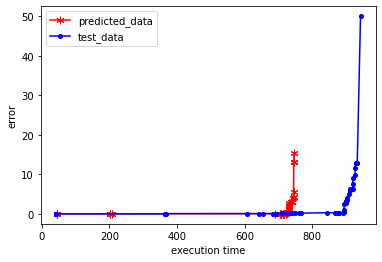

In [357]:
y_pred_exec = []
y_pred_err = []
y_test_exec = []
y_test_err = []
y_test_n = y_test.to_numpy()
y_test_n.sort()
y_pred.sort()
for i in range(50):
    y_pred_exec.append(y_pred[i][1])
    y_pred_err.append(y_pred[i][0])
    y_test_exec.append(y_test_n[i][1])
    y_test_err.append(y_test_n[i][0])
    
y_pred_exec.sort()
y_test_exec.sort()
y_pred_err.sort()
y_test_err.sort()
print(y_pred_exec)
print(y_test_exec)
    

draw_BFDJ(y_pred_exec, y_pred_err, y_test_exec, y_test_err, "execution time", "error")

In [359]:
model = DecisionTreeRegressor(max_depth=1000, splitter="best", criterion="mse", min_samples_split=2)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score: ', r2_score(y_test, y_pred))

cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print('MAPE: ', mean_absolute_percentage_error(y_test, y_pred))

Mean Absolute Error: 106.51947164845173
Mean Squared Error: 32094.489617989326
Root Mean Squared Error: 179.1493500350736
R2 score:  0.6726559838146436
MAE: 1.899 (0.234)
MAPE:  41.41093513529044


[44.378792, 44.378792, 44.378792, 44.378792, 44.378792, 200.875, 200.875, 202.375, 208.75, 988.5, 988.5, 988.5, 988.5, 988.5, 988.5, 988.5, 988.5, 988.5, 988.5, 988.5, 988.5, 988.5, 988.5, 988.5, 988.5, 988.5, 988.5, 988.5, 988.5, 988.5, 988.5, 988.5, 988.5, 988.5, 988.5, 988.5, 988.5, 988.5, 988.5, 988.5, 988.5, 988.5, 988.5, 988.5, 988.5, 988.5, 988.5, 988.5, 988.5, 988.5]
[42.458393, 42.458393, 42.458393, 42.458393, 42.458393, 363.125, 363.375, 364.375, 366.75, 606.0, 641.875, 654.75, 684.5, 692.125, 710.125, 725.125, 733.625, 739.875, 749.875, 759.625, 767.5, 844.0, 868.0, 875.125, 876.625, 878.25, 890.5, 893.0, 893.625, 895.375, 899.125, 900.75, 901.0, 902.25, 903.875, 909.25, 910.625, 910.75, 910.875, 911.875, 919.625, 919.875, 920.625, 926.5, 926.875, 928.375, 930.5, 932.75, 933.375, 943.125]


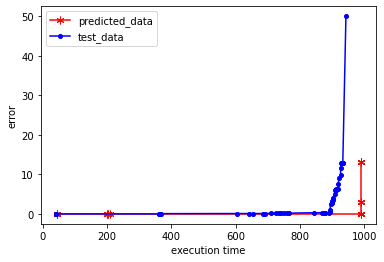

In [360]:
y_pred_exec = []
y_pred_err = []
y_test_exec = []
y_test_err = []
y_test_n = y_test.to_numpy()
y_test_n.sort()
y_pred.sort()
for i in range(50):
    y_pred_exec.append(y_pred[i][1])
    y_pred_err.append(y_pred[i][0])
    y_test_exec.append(y_test_n[i][1])
    y_test_err.append(y_test_n[i][0])
    
y_pred_exec.sort()
y_test_exec.sort()
y_pred_err.sort()
y_test_err.sort()
print(y_pred_exec)
print(y_test_exec)
    

draw_BFDJ(y_pred_exec, y_pred_err, y_test_exec, y_test_err, "execution time", "error")

In [362]:
#t = [(2),(3),(4),(5),(6),(7),(8),(9),(10),(2,2),(3,2),(4,2),(5,2),(6,2),(7,2),(8,2)]

#sc_X = StandardScaler()
#X_trainscaled=sc_X.fit_transform(x_train)
#X_testscaled=sc_X.transform(x_test)
X_trainscaled = x_train
X_testscaled = x_test

model = MLPRegressor(hidden_layer_sizes=(4,8,4),activation="relu" ,random_state=1, max_iter=50000)
#model.fit(X_trainscaled, y_train.values.ravel()).loss_
model.fit(X_trainscaled, y_train).loss_ #multiple outputs
print(model.loss_)
#print(model.loss_curve_)
print(model.n_outputs_)
print(model.best_loss_)
y_pred=model.predict(X_testscaled)


print(r2_score(y_pred, y_test))
#print("Training set score: %f" % model.score(X_trainscaled, y_train.values.ravel()))
print("Training set score: %f" % model.score(X_trainscaled, y_train)) #multiple output
print("Test set score: %f" % model.score(X_testscaled, y_test))
print('MAPE: ', mean_absolute_percentage_error(y_test, y_pred))

#print(y_test.head(60))
#print(y_pred)

116.55117579256256
2
116.31345053084232
0.5684462606830266
Training set score: 0.777751
Test set score: -0.316164
MAPE:  313.1936775281207


In [363]:
model = MultiOutputRegressor(Ridge(random_state=123))
model.fit(x_train, y_train)
#print(y_test)
y_pred = model.predict(x_test)

print(r2_score(y_pred, y_test))
print('MAPE: ', mean_absolute_percentage_error(y_test, y_pred))

-15.891887894377312
MAPE:  508.29187764886433


In [150]:
"""X = df1.drop(['executionTime', 'Error'],axis=1)
y = df1[['executionTime', 'Error']]

X = X.values
y = y.values


kf = KFold(n_splits=5, random_state=12313, shuffle=True)
kf.get_n_splits(X)
print(kf)

model = DecisionTreeRegressor()


cross_val_scores = cross_val_score(DecisionTreeRegressor(), X, y, scoring='neg_mean_squared_error', cv=5)
cross_val_scores = np.sqrt(np.abs(cross_val_scores)) 
print(cross_val_scores)
print("mean:", np.mean(cross_val_scores))


for train_index, test_index in kf.split(X):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
x_train, x_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8,test_size=0.2, random_state=101)
    
model.fit(x_train, y_train)

train_scores, valid_scores = validation_curve(DecisionTreeRegressor(), x_train, y_train, scoring='neg_mean_squared_error', cv=5)
train_scores = np.sqrt(np.abs(train_scores))
valid_scores = np.sqrt(np.abs(valid_scores))

train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

plt.title("Validation Curve with Random Forest")
plt.xlabel("max_depth")
plt.ylabel("RMSE")
plt.plot(param_range, train_scores_mean, label="train rmse")
plt.plot(param_range, valid_scores_mean, label="validation rmse")

plt.legend()
plt.show()"""

    

'X = df1.drop([\'executionTime\', \'Error\'],axis=1)\ny = df1[[\'executionTime\', \'Error\']]\n\nX = X.values\ny = y.values\n\n\nkf = KFold(n_splits=5, random_state=12313, shuffle=True)\nkf.get_n_splits(X)\nprint(kf)\n\nmodel = DecisionTreeRegressor()\n\n\ncross_val_scores = cross_val_score(DecisionTreeRegressor(), X, y, scoring=\'neg_mean_squared_error\', cv=5)\ncross_val_scores = np.sqrt(np.abs(cross_val_scores)) \nprint(cross_val_scores)\nprint("mean:", np.mean(cross_val_scores))\n\n\nfor train_index, test_index in kf.split(X):\n    x_train, x_test = X[train_index], X[test_index]\n    y_train, y_test = y[train_index], y[test_index]\n    \nx_train, x_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8,test_size=0.2, random_state=101)\n    \nmodel.fit(x_train, y_train)\n\ntrain_scores, valid_scores = validation_curve(DecisionTreeRegressor(), x_train, y_train, scoring=\'neg_mean_squared_error\', cv=5)\ntrain_scores = np.sqrt(np.abs(train_scores))\nvalid_scores = np.sqrt(np.